# Einfluss von Vektor-Quantisierung auf RGB Bilder
 
## von Emi, Karla, Vinzenz, Urs
### Seminar: Visuelle Wahrnehmung beim Menschen und Bildqualität | SS 2021

In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image           # Pillow Image Library for some image manipulations
from matplotlib.pyplot import figure
import os

## 1. Einleitung

Ein digitales Bild kann in vielen verschiedenen Formaten dargestellt werden. Dazu gehört unter anderem die Repräsentation im RGB-Farbraum. In jedem Bildpunkt wird ein Farbwert für den roten, grünen und blauen Kanal gespeichert. Die Mischung der drei unterschiedlich intensiven Farben ergibt dann die Farbe des jeweiligen Pixels. Bei dem 8-Bit Farbraum, der in diesem Experiment betrachtet wurde, gibt es für jeden Farbkanal 256 (0-255) Abstufungen. 

Bei der Quantisierung der Farbkanäle Rot, Grün und Blau wird der mögliche Farbwert eines Kanals reduziert. In einem mit 8 quantisierten Farbkanal kommen nun 265 / 8 = 32 verschiedene Farbwerte vor. Besonders wenn eine hohe Quantisisierugsstufe angewendet wird, kann die Reduzierung Auswirkungen auf die wahrgenommene Bildqualität haben. Zudem werden wahrscheinlich nicht alle Farben die gleichen Artefakte bei der Quantisierung erzeugen.

Mit diesem Experiment wurde die Farbraum-Quantisierung genauer untersucht, um folgende Frage zu beantworten:
Inwiefern beeinflusst die Vektor-Quantisierung des RGB Farbraums die wahrgenommene Bildqualität?

Das Ziel des Experiments war es, mit den Ergebnissen folgende Hypothesen zu überprüfen.

1. Je stärker die Quantisierung einer Farbe desto schlechter wird die wahrgenommene Bildqualität.
1. Bei gleicher Quantisierung beeinflussen die Farben die wahrgenommene Bildqualität unterschiedlich stark.


## 2. Stimuli und Bildmanipulation

Der Datensatz besteht aus zehn Stimuli-Bildern. Diese sind hier zu sehen.

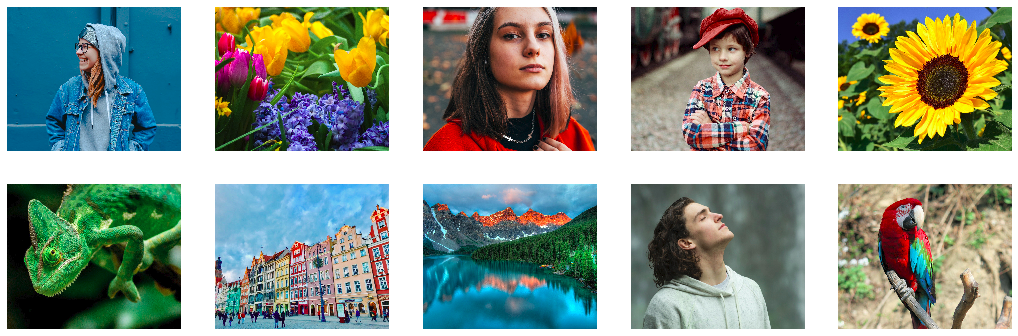

In [2]:
stimuli = []
for stimuli_path in glob.glob('Stimuli/*.png'):
    stimuli.append(mpimg.imread(stimuli_path))

plt.figure(figsize=(18,6))

for i, img in enumerate(stimuli):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')

Auf jeweils jedes Stimuli-Bild und jeden Farbkanal Rot, Grün und Blau wurde die Vektorquantisierung angewendet. Dabei betrugen die Quantisierungsstufen **2, 8, 16, 32** und **64**. Daraus ergaben sich insgesamt 160 Stimulibilder. 

In [4]:
# Collects the suqar root of channel color distirbution
# Could be more efficient with numpy
def analyse_rgb(image):
    red = np.zeros(256, np.int)
    green = np.zeros(256, np.int)
    blue = np.zeros(256, np.int)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            red[image[i][j][0]] += 1
            green[image[i][j][1]] += 1
            blue[image[i][j][2]] += 1

    return [np.sqrt(red), np.sqrt(green), np.sqrt(blue)]

In [5]:
def quantize(value, q):
    # Beispiel wenn q = 8 mapping:
    # 0-7 -> 4
    # 8-15 -> 12
    # 16-23 -> 20 
    # ...
    return ((value // q) * q) + (q // 2)

def quantize_pixel(pixel, rq, gq, bq):
    return [quantize(pixel[0], rq), quantize(pixel[1], gq), quantize(pixel[2], bq)]

# Diese Funktion ist sehr ineffizient, durch numpy und lineare 
# algebra könnte man das deutlich beschleunigen
def quantize_image(image, rq = 1, gq = 1, bq = 1):
    width, height, _ = image.shape
    
    for i in range(width):
        for j in range(height):
            pixel = image[i,j]
            image[i,j] = quantize_pixel(pixel, rq, gq, bq)

In [6]:
# plot image and rgb distribution
def plot_image_and_rgb(ax, i, q, image, r, g, b):
    ax[i][0].imshow(np.array(image))
    ax[i][0].title.set_text("Grün quantisiert mit " + str(q))

    ax[i][1].plot(r, color='r', label='Rot', linewidth=2)
    ax[i][1].plot(g, color='g', label='Grün', linewidth=2)
    ax[i][1].plot(b, color='b', label='Blau', linewidth=2)
    ax[i][1].legend(loc="upper right", fontsize='large')
    ax[i][1].set_xticks(range(0, 255,16))
    ax[i][1].title.set_text("RGB Farbverteilung")
    ax[i][1].spines['right'].set_visible(False)
    ax[i][1].spines['top'].set_visible(False)
    ax[i][1].set(xlabel='RGB Farbraum 0-255', ylabel='Quadratwurzel der Häufigkeiten')
    ax[i][1].set_ylim(ymin=0)
    ax[i][1].set_xlim(xmin=0)

In [12]:
# Beispiel Quantisierung für die Berglandschaft
stimuli_src_path = "./Stimuli/landscape-mountains-1.png"

src_image = np.array(Image.open(stimuli_src_path).convert("RGB"))

quantized_images = []
channel_analysis = []

# Added original as first image
quantized_images.append(src_image)
channel_analysis.append(analyse_rgb(src_image))

# Quantisierungs Stufen
q_stages = [2,8,16,32,64]
for q in q_stages:
    quantized_image = src_image.copy()
    quantize_image(quantized_image, gq = q)
    quantized_images.append(quantized_image)
    channel_analysis.append(analyse_rgb(quantized_image))

Die folgende Abbildungen sind ein Auszug der Stimulibilder. Sie zeigen einen die 5 Quantisierungsstufen angewendet auf den grünen Farbkanal. 

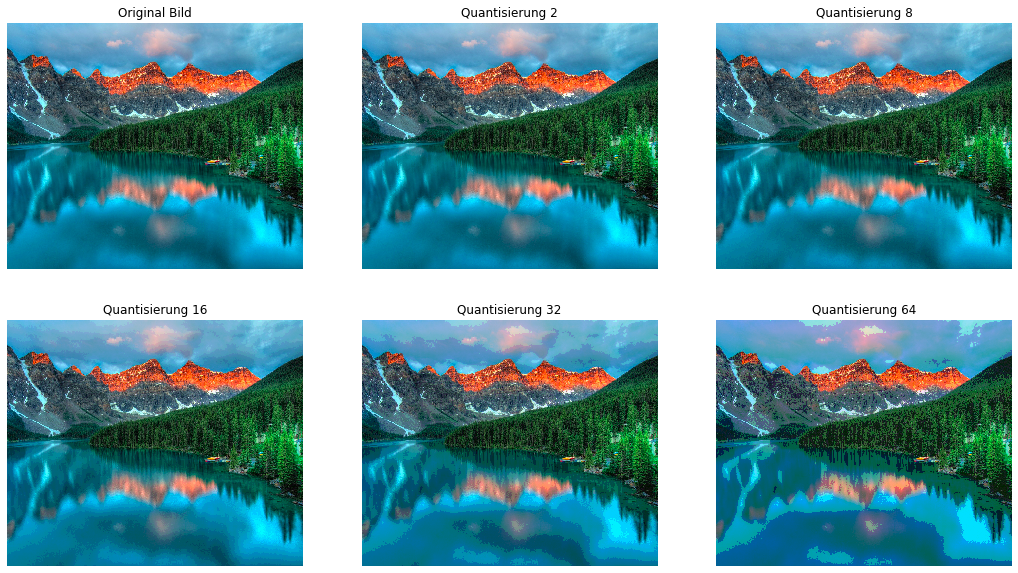

In [11]:
# Plot the quantized sample images
plt.figure(figsize=(18,10))

rows = 2
col = 3

# Plot original
plt.subplot(rows, col , 1)
plt.title('Original Bild')
plt.imshow(quantized_images[0])
plt.axis('off')

for i, q_image in enumerate(quantized_images[1:]):
    plt.subplot(rows, col, i + 2)
    plt.title("Quantisierung " + str(q_stages[i]))
    plt.imshow(q_image)
    plt.axis('off')

Die folgenden Grafiken zeigen nocheinmal genauer wie die Vektorquantisierung des grünen Farbkanals die Farbverteilung beinflussen. Bei dem Originalbild sind fast alle Grünwerte vertreten, je höher die Quantisierungsstufe desto mehr grüne Farbwerte werden "zusammengefasst" und jeweils auf einige wenige abgebildet.

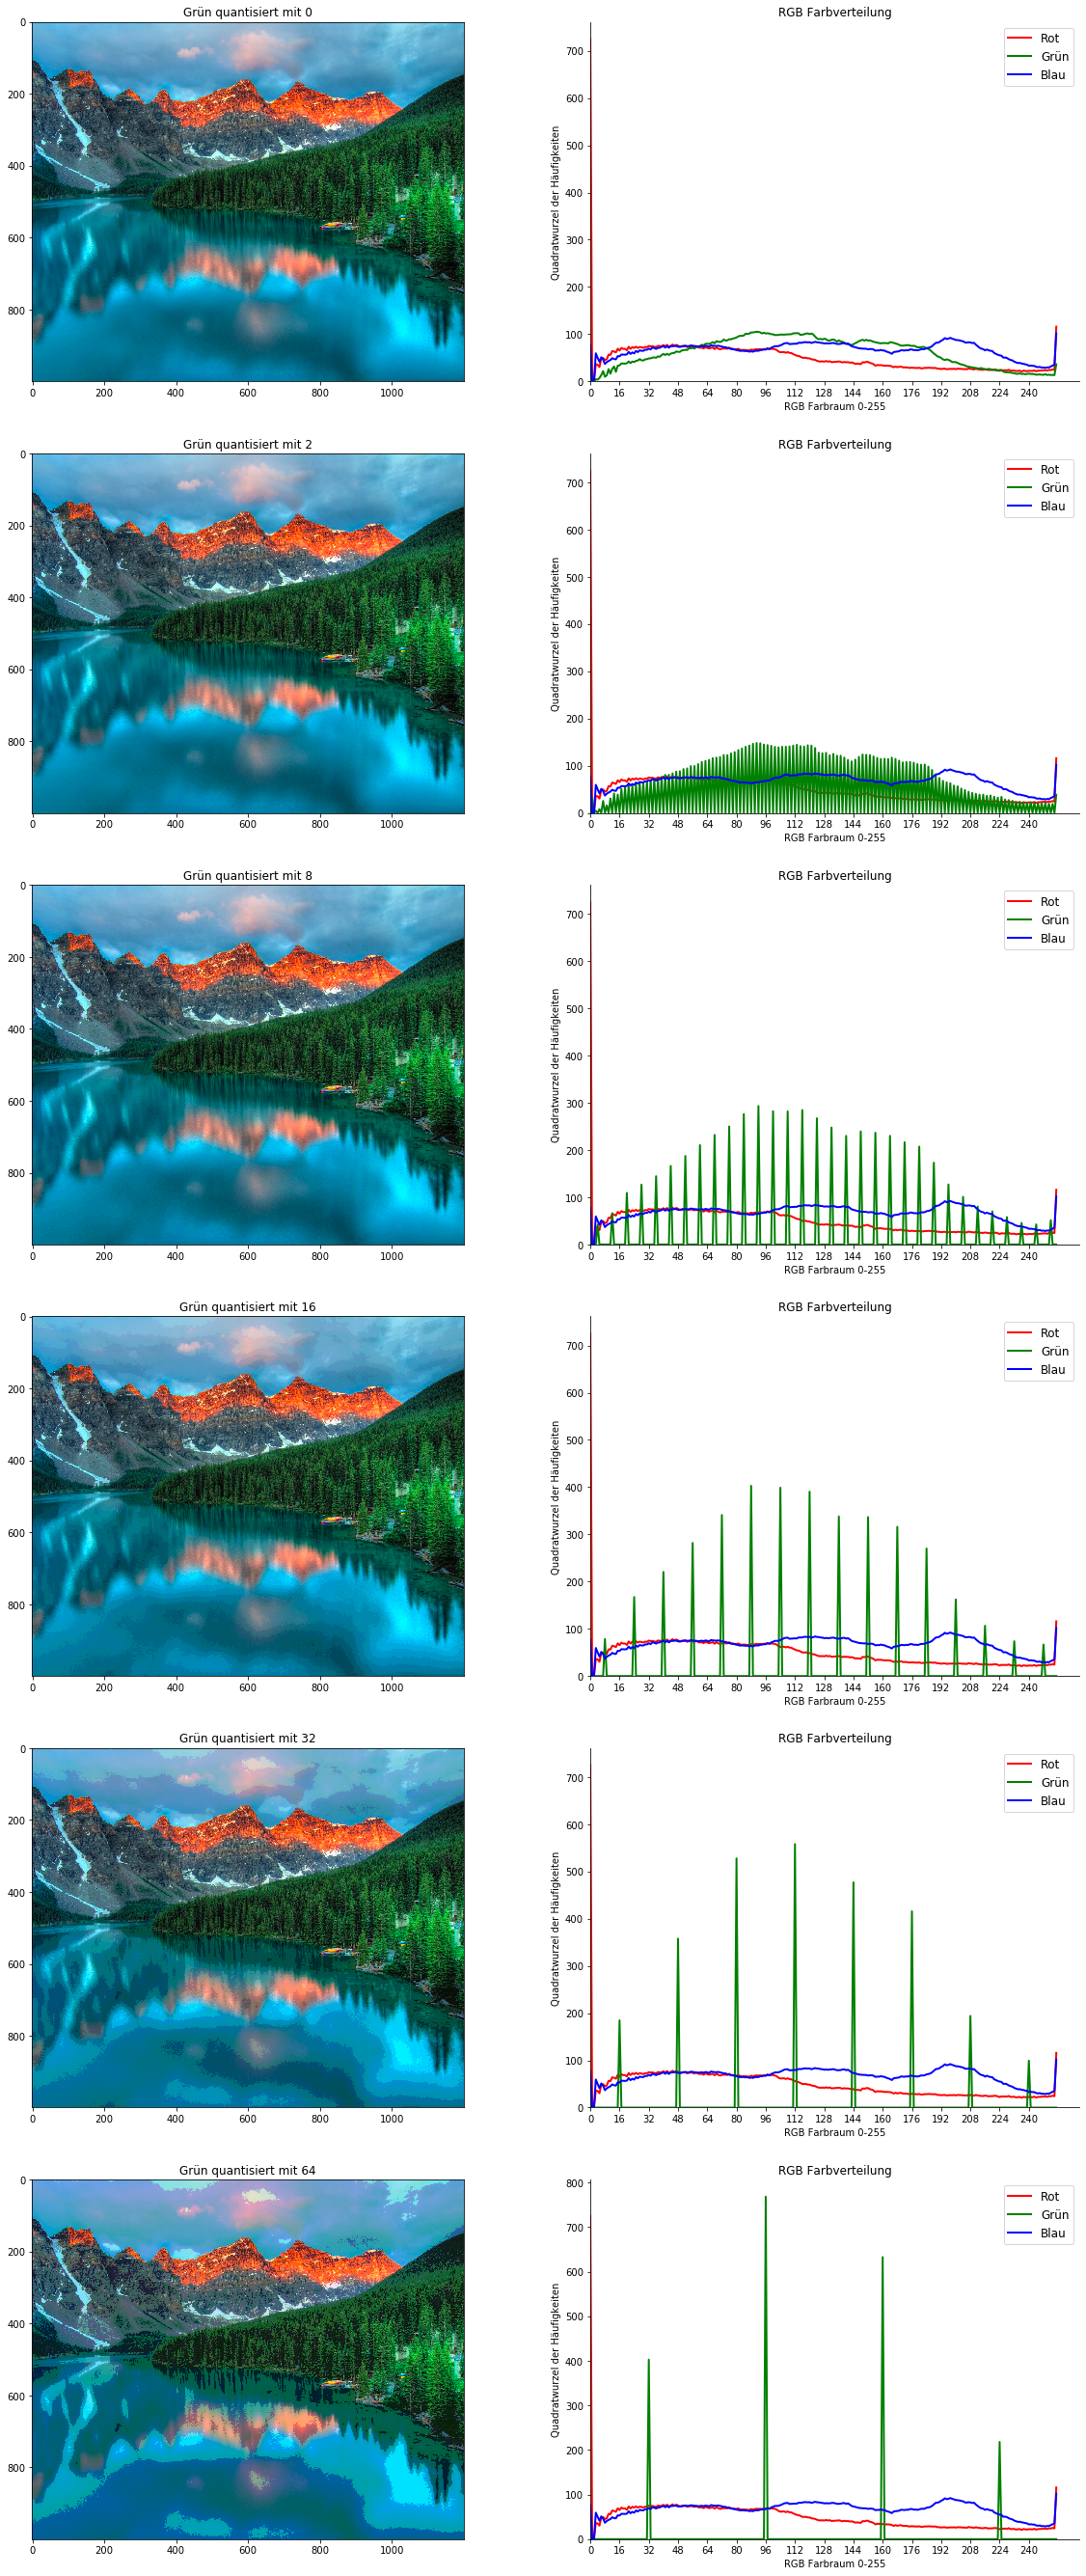

In [8]:
fig, ax = plt.subplots(6,2, figsize=(20,8*6))

# Show original picture
plot_image_and_rgb(ax, 0, 0, quantized_images[0], channel_analysis[0][0], channel_analysis[0][1], channel_analysis[0][2])

# Show quantized images
for i in range(1,len(quantized_images)):
    plot_image_and_rgb(ax, i, q_stages[i-1], quantized_images[i], channel_analysis[i][0], channel_analysis[i][1], channel_analysis[i][2])

## 3. Experiment

Für das Experiment wurde die Methode *Absolute Category Rating* verwendet. Dabei wurde den 15 Versuchsperson jeweils nur ein Bild auf einmal angezeigt. Diese hatten die Aufgabe, die Bildqualität in Kategorien **1 bis 5** einzuordnen, dabei stand *1* für *Bad*, *2* für *Poor*, *3* für *Fair*, *4* für *Good* und *5* für *Excellent*.
Das Bewerten der 160 Bilder hat circa 15 Minuten pro Versuchsperson in Anspruch genommen.

Das folgende Bild zeigt, was den Versuchperson im Experiment gezeigt wurde. 

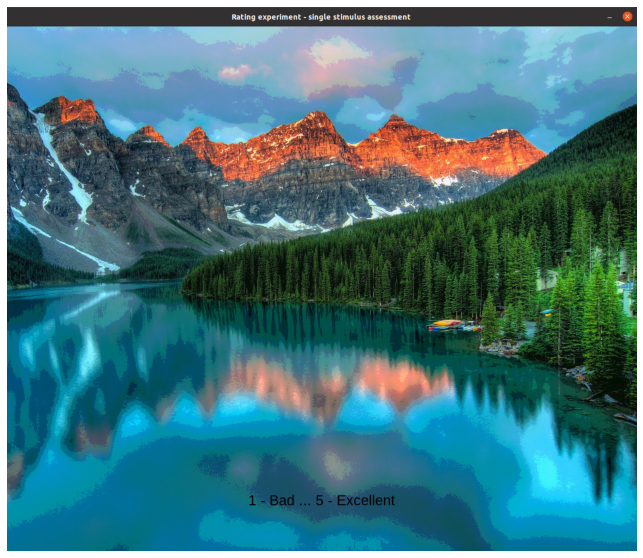

In [15]:
plt.figure(figsize=(20, 10))
               
img = mpimg.imread('Bilder/experiment_concept.png')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

## 4. Ergebnisse

Um zu überprüfen, ob die Manipulation der Farbräume geklappt hat, wurde der einseitige t-Test mit einem Alpha Niveau von 0.05 auf die Daten angewandt. Kein p-Wert war größer als das Alpha Niveau, der höchste Wert betrug 0.024, zudem waren die Werte r,g,b und q signifikant. Daher kann angenommen werden, dass die Manipulation geklappt hat. 

Die Daten wurden in R analysiert und mithilfe von ggPlot graphisch aufbereitet. 

Auf der x-Achse sind die Quantisierung Stufen **0, 2, 8, 16, 32** und **64** abgebildet, die y-Achse bildet die wahrgenommene Bildqualität (1 bis 5) ab. Die Liniengraphen und Boxplots sind in den Farben rot, blau und grün abgebildet, um die Quantisierung des entsprechenden Farbraums darzustellen. Der graue Boxplot spiegelt die Ergebnisse des Originalbildes wider. 

Die folgenden zwei Plots stellen die gemittelten Ergebnisse aller Personen dar. Zu erkennen ist, dass ab der Quantisierungsstufe **8** der Liniengraph sowohl für den roten, als auch grünen und blauen Farbraum monoton fällt. Daraus lässt sich ableiten, dass die wahrgenommene Bildqualität mit steigender Quantisierungsstufe sinkt. Während beispeilsweise für die Quantisierungsstufe **2** die Bildqualität durchschnittlich mit **4,07** bewertet wurde, lag der Wert für die Quantisierungsstufe **64** nur noch bei **1,83**.

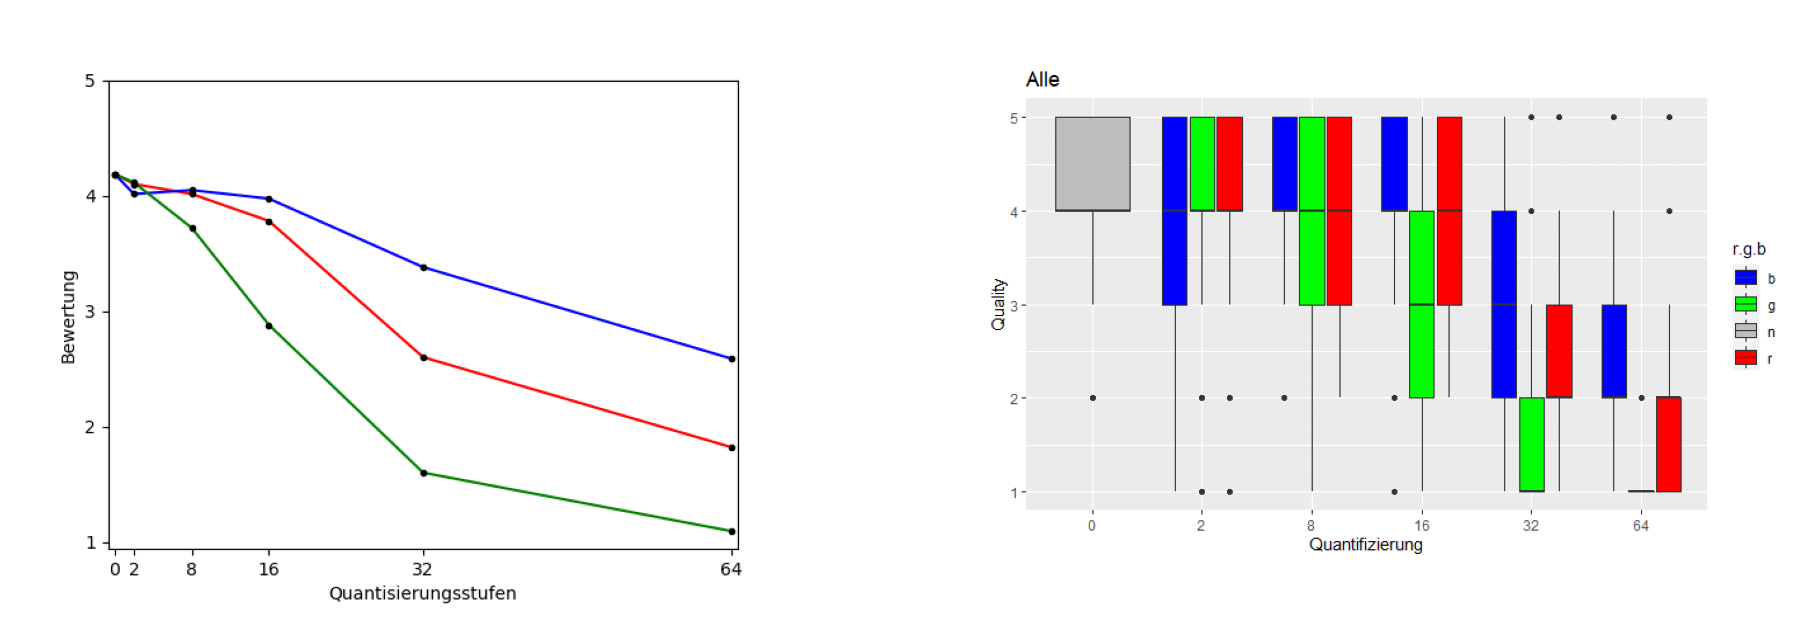

In [6]:
f = plt.figure(figsize=(32, 16))
f.add_subplot(1, 2, 1)
img1 = mpimg.imread('Auswertung/linienGraph.png')
plt.axis('off')
plt.imshow(img1)

f.add_subplot(1, 2, 2)
img2 = mpimg.imread('Auswertung/Boxplots/Alle.png')
plt.imshow(img2)

plt.axis('off')
plt.show(block=True)

Die folgenden zwei Plots zeigen die Auswertungen der Ergebnisse aller Versuchspersonen zu dem Bild *LandscapeMountains*. 

Es ist zu erkennen, dass die wahrgenommene Bildqualität von der quantisierten Farbe, abhängig ist. Die Bildqualität bei der Quantisierungstufe **16** des Farbraums **blau** wird im Vergleich zu den Anderen Farben sehr gut bewertet.  Die des **grünen** Farbraums wird hingegen relativ schlecht bewertet. Wie vermutet zeigen die Bewertungen, dass die wahrgenommene Bildqualität davon abhängig ist, welcher der drei Farbräume quantisiert wurde.

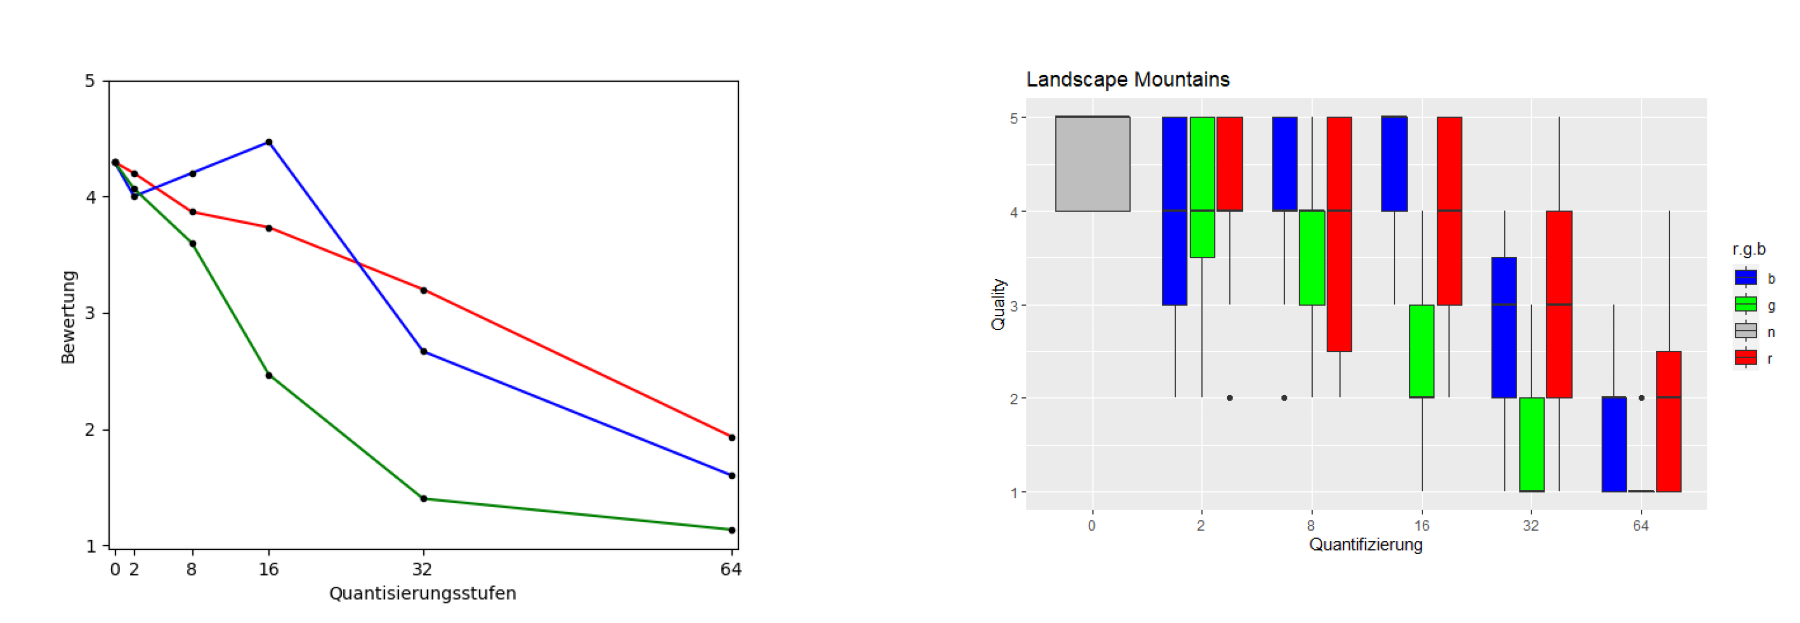

In [7]:
f = plt.figure(figsize=(32, 16))
f.add_subplot(1, 2, 1)
img1 = mpimg.imread('Auswertung/linienGraph_mountains.png')
plt.axis('off')
plt.imshow(img1)

f.add_subplot(1, 2, 2)
img2 = mpimg.imread('Auswertung/Boxplots/LandscapeMountains.png')
plt.imshow(img2)

plt.axis('off')
plt.show(block=True)

## 4. Diskussion
Wie in dem 1. Linegraph zu erkennen ist, gibt es für die Quantisierungsstufen **2** und **8** keine bedeutende Verschlechterung der wahrgenommenen Bildqualität. Wie bereits in der 1. Hypothese vermutet wurde, nimmt die wahrgenommene Qualität der Bilder mit steigender Quantisierungsstufe deutllich ab. Deshalb wird die 1. Hypothese angenommen. Weiterhin hat sich bestätigt, dass der Einfluss der Farben bei gleichbleibendem Quantisierungswert unterschiedlich ausgeprägt ist, somit wird die 2. Hypothese ebenfall angenommen.

### Mögliche Probleme 
Die Bilder, dessen Originalbild schon eine schlechte Qualität aufwies, wurden im Durchschnitt schlechter bewertet. Zudem war bei Bildern mit unscharfem Hintergrund, den Versuchspersonen unklar, auf welchen Kriterien basierend sie die Bildqualität bewerten sollen. 

### Offene Fragen
- Wie verändert sich die Dateigröße mit steigender Quantisierung?
- Hat die Quantisierung eines Farbkanals, dessen Farbe im Bild sehr dominant ist, einen größeren Einfluss auf die wahrgenommene Bildqualität als bei weniger dominanten Farben?

### Referenzen

Bilddatenbank: [unsplash](https://unsplash.com/https://unsplash.com/), abgerufen am 10.06.2021
                 
Bilddatenbank: [pixabay](https://pixabay.com/de/), abgerufen am 10.06.2021

